In [1]:
import math
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import Timer
from random import randint

In [2]:
def genRandom(n):
    return ''.join(["%s" % randint(0, 9) for num in range(0, n)])

def toInt(x):
    try:
       return int("".join(map(str, x)))
    except ValueError:
       return 0

def zeroPad(n, z, left = True):
    for i in range(z):
        if left:
            n = '0' + n
        else:
            n = n + '0'
    return n

def zeroPadList(n, z, left = True):
    if left:
        n[:0] = [0] * z
    else:
        n[0:] = [0] * z
    return n

In [3]:
def divideConquer(x, y, verbose=False): 
    if len(x) == 1 and len(y) == 1:
        return x[0] * y[0]
    
    if len(x) < len(y):
        x = zeroPadList(x, len(y) - len(x))
    elif len(y) < len(x):
        y = zeroPadList(y, len(x) - len(y))

    n = len(x)
    m = int(math.ceil(float(n) / 2))
    
    X1 = x[:m]
    X0 = x[m:]
    Y1 = y[:m]
    Y0 = y[m:]
    
    if (verbose):
        print("m:" + str(m))
        print("X1:" + str(X1))
        print("X0:" + str(X0))
        print("Y1:" + str(Y1))
        print("Y0:" + str(Y0))
        print("================")
        
    X0Y0 = divideConquer(X0, Y0)
    X0Y1 = divideConquer(X0, Y1)
    X1Y0 = divideConquer(X1, Y0)
    X1Y1 = divideConquer(X1, Y1)
    
    if (verbose):
        print("X0Y0:" + str(X0Y0))
        print("X0Y1:" + str(X0Y1))
        print("X1Y0:" + str(X1Y0))
        print("X1Y1:" + str(X1Y1))
        print("================")

    BZeroPad = n - m
    AZeroPad = BZeroPad * 2
    
    A = int(zeroPad(str(X1Y1), AZeroPad, False))
    B = int(zeroPad(str(X1Y0 + X0Y1), BZeroPad, False))
    C = X0Y0
    
    if (verbose):
        print("A:" + str(A))
        print("B:" + str(B))
        print("C:" + str(C))
        print("================")
    
    return A + B + C

def karatsuba(x, y, verbose=False):
    if len(x) == 1 and len(y) == 1:
        return x[0] * y[0]
    
    if len(x) < len(y):
        x = zeroPadList(x, len(y) - len(x))
    elif len(y) < len(x):
        y = zeroPadList(y, len(x) - len(y))
    
    n = len(x)
    m = int(math.ceil(float(n) / 2))
    
    X1 = x[:m]
    X0 = x[m:]
    Y1 = y[:m]
    Y0 = y[m:]
    
    if (verbose):
        print("m:" + str(m))
        print("X1:" + str(X1))
        print("X0:" + str(X0))
        print("Y1:" + str(Y1))
        print("Y0:" + str(Y0))
        print("================")
        
    P1 = list(map(int, str(toInt(X1) + toInt(X0))))
    P2 = list(map(int, str(toInt(Y1) + toInt(Y0))))
    
    X0Y0 = karatsuba(X0, Y0)
    X1Y1 = karatsuba(X1, Y1)
    P = karatsuba(P1, P2)
    
    if (verbose):
        print("X0Y0:" + str(X0Y0))
        print("X1Y1:" + str(X1Y1))
        print("P:" + str(P))
        print("================")
    
    BZeroPad = n - m
    AZeroPad = BZeroPad * 2
    
    A = int(zeroPad(str(X1Y1), AZeroPad, False))
    B = int(zeroPad(str(P - X1Y1 - X0Y0), BZeroPad, False))
    C = X0Y0
    
    if (verbose):
        print("A:" + str(A))
        print("B:" + str(B))
        print("C:" + str(C))
        print("================")
    
    return A + B + C

In [4]:
print("\n\nDivide & Conquer")
print("================")
b = divideConquer([1,2], [1,2], True)
print("Result: " + str(b))
print("================")

print("\n\nKaratsuba")
print("================")
k = karatsuba([1,2], [1,2], True)
print("Result: " + str(k))
print("================")



Divide & Conquer
m:1
X1:[1]
X0:[2]
Y1:[1]
Y0:[2]
X0Y0:4
X0Y1:2
X1Y0:2
X1Y1:1
A:100
B:40
C:4
Result: 144


Karatsuba
m:1
X1:[1]
X0:[2]
Y1:[1]
Y0:[2]
X0Y0:4
X1Y1:1
P:9
A:100
B:40
C:4
Result: 144


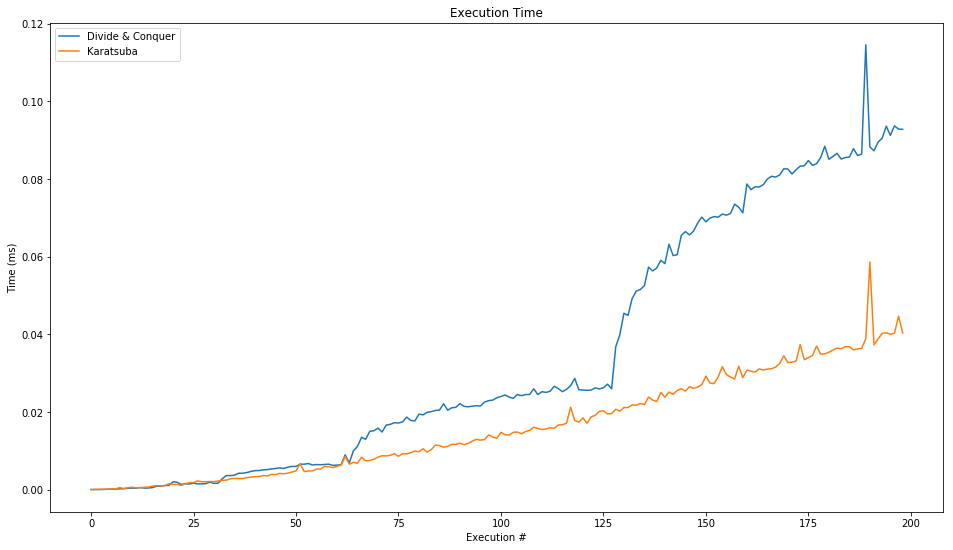

In [5]:
td = []
tk = []

for i in range(1, 200):        
    r = genRandom(i)
    n = list(map(int, str(r)))
    
    rd = Timer(lambda: divideConquer(n, n))
    rt = rd.repeat(repeat=3,number=1)
    td.append(np.mean(rt))

    rk = Timer(lambda: karatsuba(n, n))
    rt = rk.repeat(repeat=3,number=1)
    tk.append(np.mean(rt))
    
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(td, label="Divide & Conquer")
plt.plot(tk, label="Karatsuba")
plt.legend(loc="upper left")
plt.title("Execution Time")
plt.xlabel("Execution #")
plt.ylabel("Time (ms)")
plt.show()